In [1]:
import scripts.init_gpu as init_gpu
import scripts.init_dataset as init_dataset
from scripts.triplet_functions import n_neurons
import pandas as pd


init_gpu.initialize_gpus()

locations = ['LOC1', 'LOC2']

print("Loading Dataset...")
# load the dataset
df = pd.read_csv(
    f"../dataset/processed/{locations[0]}-{locations[1]}-scaled-balanced.csv")

length = len(df.columns) - 2  # subtract the two label columns

# get train-test set
train_df, test_df, train_web_samples, test_web_samples = init_dataset.get_sample(
    df, locations, range(1500), 1200)

train_df.head()

2024-10-31 13:15:57.541073: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-31 13:15:57.547918: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-31 13:15:57.555994: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-31 13:15:57.558384: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-31 13:15:57.564532: I tensorflow/core/platform/cpu_feature_guar

Num GPUs Available:  2
Loading Dataset...
Training Websites: [1309, 228, 51, 563, 501, 457, 285, 209, 1385, 1116, 178, 1209, 864, 65, 61, 191, 447, 476, 1034, 1232, 54, 1149, 407, 1466, 1330, 1436, 1490, 859, 451, 919, 1206, 569, 13, 326, 1429, 865, 696, 1468, 318, 440, 689, 1492, 189, 778, 198, 735, 704, 1236, 541, 88, 940, 1098, 255, 775, 161, 1130, 600, 1287, 1266, 740, 1182, 393, 142, 93, 1354, 466, 592, 163, 1482, 206, 1456, 1462, 928, 1301, 747, 333, 758, 727, 429, 1372, 546, 1399, 1327, 146, 1247, 1300, 350, 1093, 1495, 334, 946, 777, 552, 1310, 1140, 449, 1402, 664, 114, 469, 1486, 646, 821, 548, 135, 432, 1161, 644, 435, 1342, 1022, 810, 1316, 939, 292, 542, 1493, 505, 1478, 1103, 538, 1197, 877, 1195, 817, 741, 1404, 283, 1043, 1010, 186, 96, 224, 313, 1285, 327, 1487, 1221, 130, 788, 781, 1220, 958, 1083, 514, 1133, 23, 234, 1099, 1419, 1312, 1463, 1498, 601, 890, 323, 929, 6, 539, 1025, 365, 1039, 217, 1280, 611, 1308, 1338, 1415, 1477, 1366, 765, 330, 1104, 1086, 1, 1226, 

/home/asil0892/doh_traffic_analysis/code/scripts/init_dataset.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.sort_values(by=["Location"], inplace=True)


,Location,Website,0,1,2,3,4,5,6,7,...,116,117,118,119,120,121,122,123,124,125
0,LOC1,0,-1.086861,0.690199,0.647933,0.201517,0.207139,-0.031855,-0.316768,0.824649,...,0.055571,0.160203,0.121677,0.093533,0.09274,0.057062,0.155991,0.109839,0.086282,0.08604
1,LOC1,1005,1.095547,-1.585943,0.647933,0.343653,0.207139,-0.031855,-0.316768,0.824649,...,0.055571,0.160203,0.121677,0.093533,0.09274,0.057062,0.155991,0.109839,0.086282,0.08604
2,LOC1,1005,1.095547,0.780047,-1.972790,0.343653,0.207139,-0.031855,-0.316768,0.824649,...,0.055571,0.160203,0.121677,0.093533,0.09274,0.057062,0.155991,0.109839,0.086282,0.08604
3,LOC1,1005,-1.086861,0.690199,0.647933,0.343653,0.207139,-0.031855,-0.316768,0.824649,...,0.055571,0.160203,0.121677,0.093533,0.09274,0.057062,0.155991,0.109839,0.086282,0.08604
4,LOC1,1005,1.095547,0.780047,0.183501,-0.828965,-2.083179,-0.031855,-0.316768,0.824649,...,0.055571,0.160203,0.121677,0.093533,0.09274,0.057062,0.155991,0.109839,0.086282,0.08604


In [2]:
# dataset for the classification
target_location = 'LOC2'
target_df = test_df[test_df['Location'] == target_location]
target_df.sort_values(by=['Website'], inplace=True)
target_df.reset_index(drop=True, inplace=True)
target_df.head(20)


train_location = 'LOC1'
train_location_df = test_df[test_df['Location'] == train_location]
train_location_df.sort_values(by=['Website'], inplace=True)
train_location_df.reset_index(drop=True, inplace=True)

train_location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 128 entries, Location to 125
dtypes: float64(126), int64(1), object(1)
memory usage: 58.6+ MB


/tmp/ipykernel_1812107/3678497788.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df.sort_values(by=['Website'], inplace=True)
/tmp/ipykernel_1812107/3678497788.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_location_df.sort_values(by=['Website'], inplace=True)


In [3]:
synthetic_df = pd.read_csv('../synthesized/sampling-LOC1-target-LOC2.csv').iloc[:, 1:]
synthetic_df = synthetic_df[synthetic_df['Location'] == target_location]
synthetic_df.sort_values(by=['Website'], inplace=True)
synthetic_df.reset_index(drop=True, inplace=True)
synthetic_df.head(20)

,Location,Website,0,1,2,3,4,5,6,7,...,116,117,118,119,120,121,122,123,124,125
0,LOC2,8,0.203406,-0.314179,-0.139752,-0.071425,0.108881,-0.011975,0.151551,-0.222142,...,0.356577,-0.299774,-0.202030,0.014276,-0.422333,0.004943,-1.432474,-0.630595,-0.062904,0.319991
1,LOC2,8,0.185225,-0.414302,-0.310309,-0.049250,0.248417,-0.017623,0.285865,-0.147767,...,0.124226,-0.364065,-0.324481,-0.268335,-0.265297,-0.017370,-0.572126,-0.489263,-0.414731,-0.254916
2,LOC2,8,0.300867,-0.333989,0.771254,-0.062574,-0.007563,-0.403584,-0.441415,-1.381110,...,0.705736,-3.779596,-0.267297,1.004949,1.396240,1.055891,-1.651864,0.324592,0.963504,-0.139990
3,LOC2,8,0.123885,-0.662992,-0.892483,0.313389,0.683722,0.751752,0.881606,0.337842,...,0.961339,0.112217,0.086410,-0.366637,-0.160450,-1.389893,-0.549960,-3.518910,-1.244516,-3.602888
4,LOC2,8,0.506402,-0.445047,0.409191,-0.145644,0.030367,-0.303240,-0.255780,-1.473365,...,-0.440858,-1.647118,0.016812,0.537111,0.290844,-0.359081,-0.963809,-1.706611,0.358788,-1.795628
5,LOC2,8,0.529472,0.093815,0.332313,-0.293104,-0.472844,-0.203073,-0.341054,-1.357381,...,0.403145,-1.430642,-0.038243,0.299889,0.363038,0.185339,-0.732481,-0.812661,-0.044492,-1.392823
6,LOC2,8,0.493913,-0.444168,0.121023,-0.146445,-0.016119,-0.116675,-0.001641,-0.752897,...,0.011327,-0.785555,-0.789380,-0.492514,-0.723175,-0.082961,-1.035463,-0.854735,-0.391557,-0.296285
7,LOC2,8,0.440434,-0.364613,-0.107900,-0.028960,-0.046870,-0.120512,0.139025,-0.584830,...,0.354648,-0.733600,-0.210071,-0.051970,-0.100523,0.193880,-0.966895,-0.788626,-0.518967,-0.250285
8,LOC2,8,0.176741,-0.400024,-0.189658,-0.064648,0.302245,-0.028929,0.222665,-0.469539,...,0.178721,-0.241689,-0.424518,-0.205740,-0.092397,0.133416,-0.541934,-0.610627,-0.351969,-0.218352
9,LOC2,8,0.314194,-0.363953,-0.147444,-0.077837,0.072941,-0.075567,0.175021,-0.445487,...,0.266730,-0.662978,-0.435572,-0.241315,-0.211038,0.138796,-1.011317,-0.861465,-0.590561,-0.278451


In [42]:
import pandas as pd
import numpy as np
import scripts.classification as classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import random

def prepare_data(target_df, synthetic_df, available_websites, missing_websites, test_size=0.2, random_state=42):
    # Split the target data into initial train and test sets
    target_train, target_test = train_test_split(target_df, test_size=test_size, random_state=random_state, stratify=target_df['Website'])
    
    # Filter target data for available websites (for training)
    target_train_data = target_train[target_train['Website'].isin(available_websites)]
    
    # Get synthetic data for missing websites (for training)
    synthetic_train_data = synthetic_df[synthetic_df['Website'].isin(missing_websites)]
    
    # Combine real and synthetic data for training
    train_data = pd.concat([target_train_data, synthetic_train_data], axis=0)
    
    # Prepare features and labels for training
    X_train = train_data.iloc[:, 2:]  # All columns except 'Location' and 'Website'
    y_train = train_data['Website']
    
    # Prepare test data (only real data from the target test set)
    X_test = target_test.iloc[:, 2:]
    y_test = target_test['Website']
    
    # Encode labels
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train)
    y_test_encoded = le.transform(y_test)
    
    return X_train, y_train_encoded, X_test, y_test_encoded, le

for i in range(10):
    available_websites = random.sample(test_web_samples, 250)
    missing_websites = list(set(test_web_samples) - set(available_websites))

    print("Available websites:", available_websites)
    print("Missing websites:", missing_websites)

    # using synthetic
    # Prepare the data
    X_train, y_train, X_test, y_test, le = prepare_data(target_df, synthetic_df, available_websites, missing_websites)

    # Train and evaluate the model
    model = RandomForestClassifier()
    print("Trained partially on the synthesized data: ")
    accuracy, precision, recall, f1_score, cm = classification.evaluate_classification_model(X_train, y_train, X_test, y_test, model)
    # classification.show_confusion_matrix_heatmap(cm, le, f"Synthetic Data: missing classes: {missing_websites}")
    
    # using real data from X
    # Prepare the data
    X_train, y_train, X_test, y_test, le = prepare_data(target_df, train_location_df, available_websites, missing_websites)

    # Train and evaluate the model
    model = RandomForestClassifier()
    print("Trained partially on the data from another location: ")
    accuracy, precision, recall, f1_score, confusion_matrix = classification.evaluate_classification_model(X_train, y_train, X_test, y_test, model)
    # classification.show_confusion_matrix_heatmap(cm, le, f"From LOC1: missing classes: {missing_websites}")


Available websites: [394, 951, 885, 591, 1117, 991, 187, 1013, 1416, 705, 874, 1315, 510, 347, 876, 588, 785, 884, 992, 213, 325, 126, 1425, 562, 1095, 581, 1097, 1400, 1102, 1348, 106, 558, 794, 99, 872, 307, 373, 554, 762, 1296, 814, 597, 182, 128, 927, 1114, 444, 1065, 653, 1446, 238, 1176, 556, 846, 623, 760, 945, 353, 184, 420, 1264, 847, 359, 441, 782, 288, 789, 419, 520, 780, 961, 482, 297, 111, 11, 979, 112, 813, 434, 948, 137, 933, 515, 383, 1077, 754, 1413, 1193, 544, 372, 835, 787, 385, 550, 473, 733, 602, 158, 181, 491, 1162, 573, 1442, 1003, 315, 133, 243, 1286, 37, 1041, 1084, 1358, 1294, 1037, 397, 36, 381, 190, 795, 950, 1229, 391, 1331, 690, 310, 346, 214, 1441, 1164, 494, 44, 1141, 1281, 1401, 1244, 983, 15, 91, 675, 1289, 531, 374, 84, 635, 1113, 1076, 616, 1143, 845, 964, 1341, 720, 1305, 1094, 49, 669, 1249, 1008, 1230, 654, 34, 1297, 526, 1211, 8, 706, 547, 640, 917, 682, 1319, 1349, 827, 80, 1028, 1227, 575, 351, 1409, 915, 998, 722, 1311, 405, 1299, 805, 952, 96

KeyboardInterrupt: 

# Handpicked best 50 synthesized according to the Euclidean Distance Error

In [44]:
missing_websites = [992, 1168, 1432, 1464, 288, 1143, 1365, 1095, 1114, 1292]
available_websites = list(set(test_web_samples) - set(missing_websites))

print("Available websites:", available_websites)
print("Missing websites:", missing_websites)

# using synthetic
# Prepare the data
X_train, y_train, X_test, y_test, le = prepare_data(
    target_df, synthetic_df, available_websites, missing_websites)

# Train and evaluate the model
model = RandomForestClassifier()
print("Trained partially on the synthesized data: ")
accuracy, precision, recall, f1_score, cm = classification.evaluate_classification_model(
    X_train, y_train, X_test, y_test, model)
# classification.show_confusion_matrix_heatmap(cm, le, f"Synthetic Data: missing classes: {missing_websites}")

# using real data from X
# Prepare the data
X_train, y_train, X_test, y_test, le = prepare_data(
    target_df, train_location_df, available_websites, missing_websites)

# Train and evaluate the model
model = RandomForestClassifier()
print("Trained partially on the data from another location: ")
accuracy, precision, recall, f1_score, confusion_matrix = classification.evaluate_classification_model(
    X_train, y_train, X_test, y_test, model)
# classification.show_confusion_matrix_heatmap(cm, le, f"From LOC1: missing classes: {missing_websites}")

Available websites: [1028, 1030, 8, 9, 1032, 11, 1033, 1037, 15, 1041, 24, 32, 1056, 34, 36, 37, 1062, 1065, 1067, 44, 1068, 49, 1076, 1077, 57, 1082, 1084, 68, 1094, 71, 1097, 1102, 80, 84, 1113, 91, 1117, 94, 98, 99, 100, 1122, 106, 107, 111, 112, 113, 1141, 1142, 1145, 126, 128, 1152, 132, 133, 134, 1156, 137, 1162, 1164, 1176, 157, 158, 1181, 1184, 1193, 172, 181, 182, 184, 187, 1211, 1212, 190, 1215, 192, 1224, 1227, 1229, 1230, 207, 213, 214, 1239, 1244, 1249, 1254, 235, 238, 1264, 243, 252, 1276, 1281, 1286, 1289, 1291, 1294, 1296, 1297, 1299, 1303, 1305, 1311, 1315, 294, 1319, 297, 1321, 307, 1331, 310, 315, 1340, 1341, 321, 1348, 325, 1349, 1357, 1358, 1359, 342, 346, 347, 351, 353, 354, 359, 368, 372, 373, 374, 376, 1400, 1401, 381, 383, 385, 386, 1409, 1413, 391, 1416, 394, 396, 397, 400, 401, 402, 1425, 405, 413, 1441, 1442, 419, 420, 1443, 1446, 434, 441, 1465, 1467, 444, 1470, 454, 463, 1489, 1494, 473, 474, 482, 485, 491, 492, 494, 498, 510, 513, 515, 520, 526, 531, 544,

# Train on Synthetic, Test on Actual

In [4]:
def preprocess_data_for_web_classification(train_location_df, target_location_df, train_location, test_location):
    le = LabelEncoder()
    X_train = train_location_df[train_location_df['Location'] == train_location].drop(
        ['Location', 'Website'], axis=1)
    X_test = target_location_df[target_location_df['Location'] == test_location].drop(
        ['Location', 'Website'], axis=1)
    
    y_train = train_location_df[train_location_df['Location'] == train_location]['Website']
    y_test = target_location_df[target_location_df['Location'] == test_location]['Website']

    y_test = le.fit_transform(y_test)
    y_train = le.fit_transform(y_train)

    return X_train, y_train, X_test, y_test, le



In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import scripts.classification as classification

model = RandomForestClassifier()
X_train, y_train, X_test, y_test, le = preprocess_data_for_web_classification(synthetic_df, target_df, 'LOC2', 'LOC2')
accuracy, precision, recall, f1_score, cm = classification.evaluate_classification_model(X_train, y_train, X_test, y_test, model)

Accuracy: 11.76, F1 Score:  8.87, Precision:  11.01, Recall:  11.76


In [7]:
model.feature_importances_

array([0.00551038, 0.00865423, 0.00499711, 0.00930905, 0.00657184,
       0.00582409, 0.00491639, 0.00445065, 0.00935057, 0.00445735,
       0.00599664, 0.01181599, 0.01009915, 0.00987499, 0.00678659,
       0.00784897, 0.01096159, 0.0110471 , 0.01190982, 0.0083488 ,
       0.00934716, 0.01057891, 0.01077117, 0.01087088, 0.00809168,
       0.00940118, 0.01053337, 0.01014823, 0.0098367 , 0.00756151,
       0.00939466, 0.00902372, 0.0096759 , 0.00971414, 0.00686099,
       0.00902069, 0.00925922, 0.0091321 , 0.00925508, 0.0060042 ,
       0.00922879, 0.00883642, 0.00873171, 0.00921564, 0.00595471,
       0.00871605, 0.00949108, 0.00927673, 0.00763584, 0.00633038,
       0.00829786, 0.00863335, 0.00873818, 0.00842418, 0.00566738,
       0.00906406, 0.00794059, 0.0088508 , 0.00759698, 0.0056253 ,
       0.00730147, 0.00795783, 0.00725209, 0.00767712, 0.00515663,
       0.00846798, 0.00887356, 0.00750193, 0.00831806, 0.00588214,
       0.00823078, 0.00964374, 0.00782754, 0.00814804, 0.00582

In [14]:
true_pos_synths = np.zeros(shape=(len(test_web_samples)))
for i in range(len(test_web_samples)):
    true_pos_synths[i] = cm[i][i]
    
print(true_pos_synths)

[ 35.  33.  16. 137.   0.   0.   0.  41.   4.   4. 104.  49.   0.   7.
   7.   0.  19.  17.   0.   0.  41. 127.  88.   0.   0.   0.   2.  24.
   2.   3.   8.   0.   0.  47.   1.  14.   0.   2.   0.   0.   0.   0.
   0.   6.   7.  42.   0.   0.   0.   0. 111.   0.   0.  21.   0.   0.
  54.   0.   3.  42.   0.   2.   0.  11.  23.   0.  67.   0.   0.   1.
   0.   0.   0.   0.  62.  56.  19.   0.   0.   4.  15.   0.  61.   0.
   0.   0.  12.  99.   4. 159.  65.   0.   2.   0.  51.   2.   5.  17.
  61.  88.   4. 131.  14.   5.   0. 118.   0.   2.   0.   0.  28.   0.
  71.   0. 142.   0. 124.   0.   9.   0.   0.  36.   0.  18.  77.   0.
   0.   0.  29.  53.  50.  31.   0.  12.   0.   2. 145.  61.  35.   0.
   1.   2.   0.  56.  10.  84.   0. 113.  83. 182.   0. 118.   0.  52.
   0. 183.   2.   4.   1.  66.  50.   0.  39.   0.   0.  28. 101.   0.
   0.   8.   0.  54.  24.  38.  69.   0.   0.   3. 105.   0.  81.   0.
   1.   0.  83.   0.   3.  94.   0.   0.  46.   0. 125.  29.  62.   7.
   0. 

# Train of another Location, test of Target location

In [22]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier()
X_train, y_train, X_test, y_test, le = preprocess_data_for_web_classification(train_location_df, target_df, 'LOC1', 'LOC2')
accuracy, precision, recall, f1_score, confusion_matrix = classification.evaluate_classification_model(X_train, y_train, X_test, y_test, model)

Accuracy: 63.81, F1 Score:  65.51, Precision:  72.42, Recall:  63.81


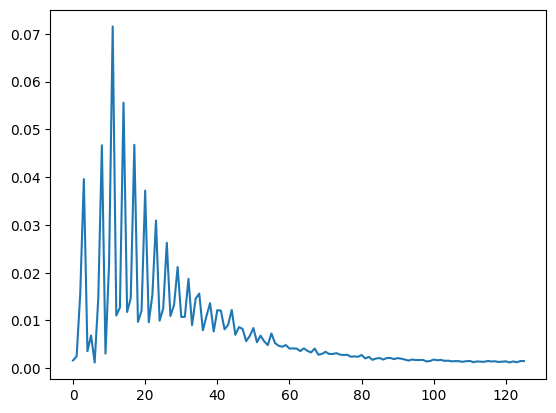

In [35]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(model.feature_importances_)
plt.show()

pandas.core.frame.DataFrame

In [ ]:
step = 10
# Loop through each step and set elements to zero
print("0.815")
for i in range(0, X_train.shape[1], step):
    _, _, X_test, y_test, le = preprocess_data_for_web_classification(train_location_df[train_location_df['Website'] == 8], target_df[target_df['Website'] == 8], 'LOC1', 'LOC2')
    # print(X_test.shape, y_test.shape)
    X_test_copy = X_test.copy()
    X_test_copy.iloc[:, i:i + step] = 0
    accuracy = model.score(X_test_copy, y_test)
    print(accuracy)


81.5
0.785
0.695
0.78
0.66
0.79
0.83
0.825
0.82
0.81
0.825
0.8
0.795
0.815


In [18]:
true_pos_dif_location = np.zeros(shape=(len(test_web_samples)))
for i in range(len(test_web_samples)):
    true_pos_dif_location[i] = confusion_matrix[i][i]
    
print(true_pos_dif_location)

[154. 145. 136. 175.  73. 146. 162. 139. 139. 141. 179. 111. 139.  40.
  12. 134. 146. 103. 153. 100.  87. 121. 126. 144. 178. 167.  55. 174.
 117.  83. 126.  50.  77. 124. 134. 141.  95. 118. 143. 130.  27.  75.
 114. 162. 106. 115.  99. 185. 121. 126. 156. 108. 122.  90. 175. 115.
 152. 175. 173. 183. 153.  98. 117.  92. 155. 153. 148.   0. 154. 130.
 186. 145. 185.   4. 125. 159.  37.   4. 146.  92. 181. 159. 159. 134.
 126. 130. 125.  77. 175. 169.  96.  99.  96. 107. 139.  72. 139. 118.
  54. 124. 176. 188. 140. 103. 137. 132. 134.  87. 135. 126. 169. 185.
 173. 137. 175. 141. 139. 146. 116. 149. 126. 169. 112. 100. 138. 149.
 150.  91. 152. 175. 116. 142. 146. 144.  62. 129. 181. 187. 181. 168.
 131. 155. 178.  99. 166. 143. 119. 142.  28. 130.   0. 144. 129. 150.
 181. 175.  98. 168. 105. 158. 110. 145. 141. 122. 110. 163. 171.  92.
 142. 164. 110. 147. 154. 103. 123. 171. 116. 141. 182. 110. 126. 138.
 179. 142. 117. 138. 113. 171. 143. 177. 144. 149. 180. 135. 127. 118.
  53. 

In [19]:
true_pos_synths > true_pos_dif_location

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

# Train on both synthetic and other location's data and test on the actual

In [25]:
mixed_df = pd.concat((synthetic_df, train_location_df), axis = 0)

In [37]:
mixed_df.sort_values(by=['Website'], inplace=True)

In [40]:
X_train = mixed_df.iloc[:, 2:]
y_train = mixed_df.Website
X_test = target_df.iloc[:, 2:]
y_test = target_df.Website

le = LabelEncoder()
y_test = le.fit_transform(y_test)
y_train = le.transform(y_train)

In [41]:
model = RandomForestClassifier()
accuracy, precision, recall, f1_score, confusion_matrix = classification.evaluate_classification_model(X_train, y_train, X_test, y_test, model)

Accuracy: 60.15, F1 Score:  60.53, Precision:  65.77, Recall:  60.15


# Location Classification using Synthetic Data

The location classification had an high accuracy with just a XGBoostClassifier model. If our synthetic data is good, it should also be easily distinguishable. 

In [45]:
synthetic_df = pd.concat((pd.read_csv('../synthesized/sampling-LOC1-target-LOC2.csv').iloc[:, 1:], 
                         pd.read_csv('../synthesized/sampling-LOC2-target-LOC1.csv').iloc[:, 1:] 
                          ), axis=0)

In [ ]:
from scripts.init_dataset import get_sample

train_synthetic_df, test_synthetic_df, _, _ = get_sample(synthetic_df, ['LOC1', 'LOC2'], test_web_samples, 200)

Training Websites: [1309, 228, 51, 563, 501, 457, 285, 209, 1385, 1116, 178, 1209, 864, 65, 61, 191, 447, 476, 1034, 1232, 54, 1149, 407, 1466, 1330, 1436, 1490, 859, 451, 919, 1206, 569, 13, 326, 1429, 865, 696, 1468, 318, 440, 689, 1492, 189, 778, 198, 735, 704, 1236, 541, 88, 940, 1098, 255, 775, 161, 1130, 600, 1287, 1266, 740, 1182, 393, 142, 93, 1354, 466, 592, 163, 1482, 206, 1456, 1462, 928, 1301, 747, 333, 758, 727, 429, 1372, 546, 1399, 1327, 146, 1247, 1300, 350, 1093, 1495, 334, 946, 777, 552, 1310, 1140, 449, 1402, 664, 114, 469, 1486, 646, 821, 548, 135, 432, 1161, 644, 435, 1342, 1022, 810, 1316, 939, 292, 542, 1493, 505, 1478, 1103, 538, 1197, 877, 1195, 817, 741, 1404, 283, 1043, 1010, 186, 96, 224, 313, 1285, 327, 1487, 1221, 130, 788, 781, 1220, 958, 1083, 514, 1133, 23, 234, 1099, 1419, 1312, 1463, 1498, 601, 890, 323, 929, 6, 539, 1025, 365, 1039, 217, 1280, 611, 1308, 1338, 1415, 1477, 1366, 765, 330, 1104, 1086, 1, 1226, 663, 1000, 39, 229, 743, 629, 490, 118, 49

/home/asil0892/doh_traffic_analysis/code/scripts/init_dataset.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.sort_values(by=["Location"], inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def preprocess_data(train_df: pd.DataFrame, test_df: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame, LabelEncoder]:
    le = LabelEncoder()
    X_train = train_df.iloc[:, 2:]
    X_test = test_df.iloc[:, 2:]

    y_train = le.fit_transform(train_df['Location'])
    y_test = le.transform(test_df['Location'])

    return (X_train, X_test, y_train, y_test, le)

model = RandomForestClassifier()
X_train, X_test, y_train, y_test, le = preprocess_data(train_synthetic_df, test_synthetic_df)
classification.evaluate_classification_model(X_train, y_train, X_test, y_test, model)

Accuracy: 90.85, F1 Score:  90.83, Precision:  91.21, Recall:  90.85


(0.9085166666666666,
 0.9120678790950376,
 0.9085166666666666,
 0.9083191396162973,
 array([[51726,  8274],
        [ 2704, 57296]]))